# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', 
    index_col='date', 
    parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

covid = pd\
    .read_csv('data/covid19_cases.csv')\
    .assign(
        date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
    )\
    .set_index('date')\
    .replace('United_States_of_America', 'USA')\
    .sort_index()['2020-01-18':'2020-09-18']

# Exercise 1

Plot the rolling 20-day minimum of the Facebook closing price using pandas .

<AxesSubplot:title={'center':"Rolling 20-day minimum of Facebook's closing price"}, xlabel='date'>

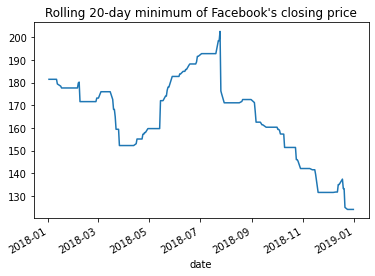

In [6]:
closePriceRollingMinimum = fb\
    .close\
    .rolling('20D').min()


closePriceRollingMinimum.plot(
    kind='line',
    title='Rolling 20-day minimum of Facebook\'s closing price'
)

# Exercise 2

Create a histogram and KDE of the change from open to close in the price of
Facebook stock.

<AxesSubplot:title={'center':'KDE'}, ylabel='Density'>

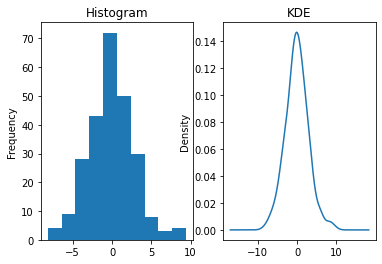

In [23]:
diffOpenClose =  fb.open - fb.close

fig, axes = plt.subplots(1, 2)

diffOpenClose\
    .plot(
        kind='hist',
        ax=axes[0], 
        title='Histogram'
    )

diffOpenClose\
    .plot(
        kind='kde',
        ax=axes[1],
        title='KDE'
    )


# Exercise 3

Using the earthquake data, create box plots for the magnitudes of each magType
used in Indonesia.

mb            AxesSubplot(0.1,0.559091;0.363636x0.340909)
ms_20    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
mwr               AxesSubplot(0.1,0.15;0.363636x0.340909)
mww          AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

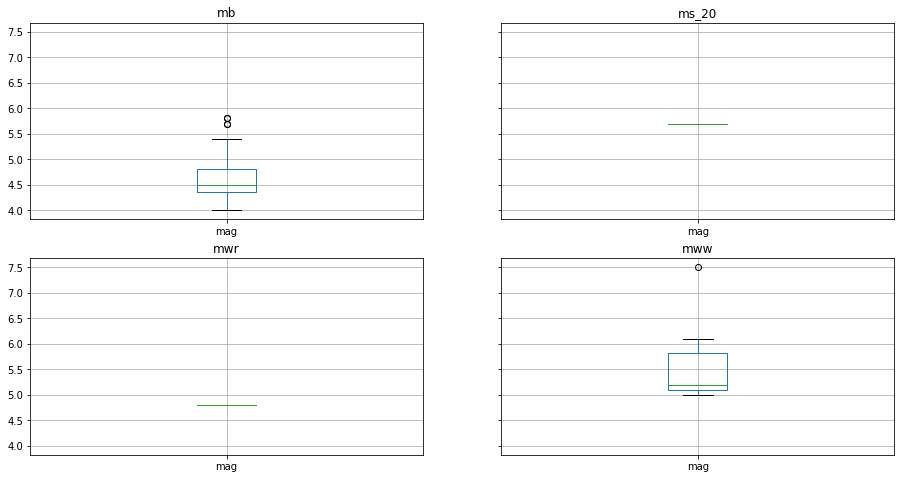

In [58]:
#'''
quakes\
    .query("parsed_place=='Indonesia'")\
    .loc[:, ['mag', 'magType']]\
    .groupby('magType')\
    .boxplot(
        layout=(2, 2), 
        figsize=(15, 8), 
    )


#'''


# Exercise 4

Build a crosstab with the earthquake data between the tsunami column and the
magType column. Rather than showing the frequency count, show the maximum
magnitude that was observed for each combination. Put the magnitude type along
the columns.

# Exercise 5

Calculate the rolling 60-day aggregations of the OHLC data by ticker for the
FAANG data. Use the same aggregations as exercise 3.

# Exercise 6

Create a pivot table of the FAANG data that compares the stocks. Put the ticker in
the rows and show the averages of the OHLC and volume traded data.

# Exercise 7

Calculate the Z-scores for each numeric column of Amazon's data ( ticker is
AMZN) in Q4 2018 using apply().

# Exercise 8

Add event descriptions:

* Create a dataframe with the following three columns: ticker , date , and event. The columns should have the following values:

    - ticker : 'FB'
    - date : ['2018-07-25', '2018-03-19', '2018-03-20']
    - event : ['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation']

* Set the index to ['date', 'ticker'] .

* Merge this data with the FAANG data using an outer join.

# Exercise 9

Use the transform() method on the FAANG data to represent all the
values in terms of the first date in the data. To do so, divide all the values for
each ticker by the values for the first date in the data for that ticker. This is
referred to as an index, and the data for the first date is the base ( https://
ec.europa.eu/eurostat/statistics-explained/index.php/
Beginners:Statistical_concept_-_Index_and_base_year ). When
data is in this format, we can easily see growth over time. Hint: transform() can
take a function name.

# Exercise 10

The European Centre for Disease Prevention and Control (ECDC) provides
an open dataset on COVID-19 cases called daily number of new reported cases
of COVID-19 by country worldwide ( https://www.ecdc.europa.eu/
en/publications-data/download-todays-data-geographic-
distribution-covid-19-cases-worldwide ). This dataset is updated daily,
but we will use a snapshot that contains data through September 18, 2020. Complete
the following tasks to practice the skills you've learned up to this point in the book:

* Prepare the data:
    - Read in the data in the covid19_cases.csv file.
    - Create a date column by parsing the dateRep column into a datetime.
    - Set the date column as the index.
    - Use the replace() method to update all occurrences of United_States_of_America and United_Kingdom to USA and UK, respectively.
    - Sort the index.

a) For the five countries with the most cases (cumulative), find the day with the largest number of cases.

b) Find the 7-day average change in COVID-19 cases for the last week in the data for the five countries with the most cases.

c) Find the first date that each country other than China had cases.

d) Rank the countries by cumulative cases using percentiles.

<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_01/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Chapter 2 &#8594;</button>
        </a>
    </div>
</div>
<hr>